<a href="https://colab.research.google.com/github/Kammara-Kaveri/elevatelabs/blob/main/ml_task6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from sklearn.datasets import load_iris
import pandas as pd

# Load the iris dataset
iris = load_iris()

# Convert to pandas DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Display first few rows
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Normalize the features
X = df.drop('target', axis=1)  # Features
y = df['target']               # Target

X_scaled = scaler.fit_transform(X)  # Apply scaling

# You can check the first few rows after scaling
print(pd.DataFrame(X_scaled, columns=X.columns).head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.900681          1.019004          -1.340227         -1.315444
1          -1.143017         -0.131979          -1.340227         -1.315444
2          -1.385353          0.328414          -1.397064         -1.315444
3          -1.506521          0.098217          -1.283389         -1.315444
4          -1.021849          1.249201          -1.340227         -1.315444


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN model with k = 3
knn = KNeighborsClassifier(n_neighbors=3)


In [ ]:
# Train the KNN model using the training data
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Use the trained KNN model to make predictions
y_pred = knn.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score

# Compare predicted values with actual values
accuracy = accuracy_score(y_test, y_pred)

# Print the result
print("Accuracy with k=3:", accuracy)


Accuracy with k=3: 1.0


In [ ]:
# Initialize KNN with k = 5
knn5 = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn5.fit(X_train, y_train)

# Predict using the model
y_pred5 = knn5.predict(X_test)

# Evaluate accuracy
accuracy5 = accuracy_score(y_test, y_pred5)
print("Accuracy with k=5:", accuracy5)


Accuracy with k=5: 1.0


In [ ]:
# Initialize KNN with k = 7
knn7 = KNeighborsClassifier(n_neighbors=7)

# Train the model
knn7.fit(X_train, y_train)

# Predict using the model
y_pred7 = knn7.predict(X_test)

# Evaluate accuracy
accuracy7 = accuracy_score(y_test, y_pred7)
print("Accuracy with k=7:", accuracy7)


Accuracy with k=7: 1.0


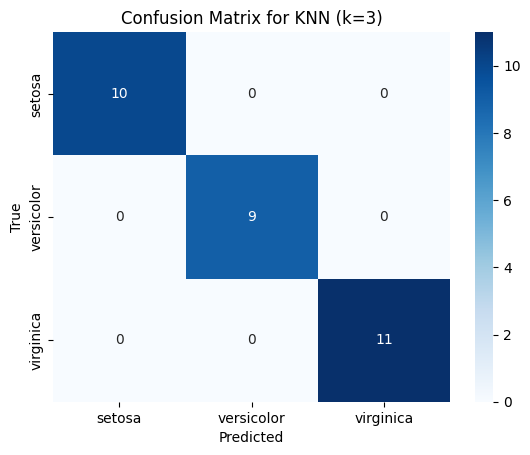

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get the confusion matrix for k=3
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using seaborn heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)

# Label the axes
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for KNN (k=3)')
plt.show()


In [4]:
from sklearn.preprocessing import StandardScaler

# Select only the first two features for visualization (sepal length and sepal width)
X_2d = iris.data[:, :2]  # First two features
# Normalize the features using StandardScaler
scaler = StandardScaler()
X_2d_scaled = scaler.fit_transform(X_2d)

In [5]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(X_2d_scaled, iris.target, test_size=0.2, random_state=42)


In [6]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier with k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model
knn.fit(X_train_2d, y_train_2d)


KNeighborsClassifier()

In [7]:
import numpy as np

# Create a mesh grid for the 2D feature space
h = 0.02  # Step size in the mesh
x_min, x_max = X_2d_scaled[:, 0].min() - 1, X_2d_scaled[:, 0].max() + 1
y_min, y_max = X_2d_scaled[:, 1].min() - 1, X_2d_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


In [8]:
# Predict class labels for each point in the mesh grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)  # Reshape the predictions to fit the mesh grid


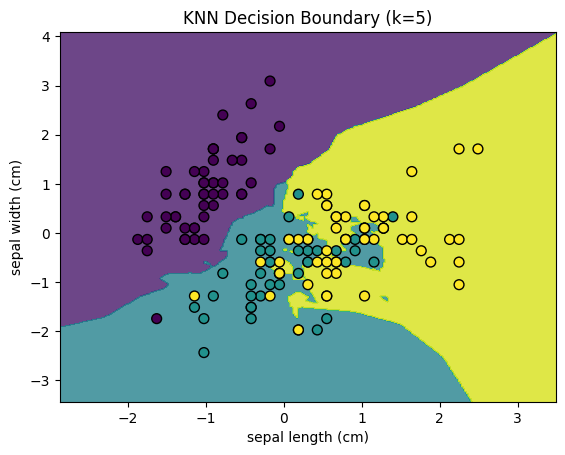

In [9]:
import matplotlib.pyplot as plt

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8)

# Plot the training data points
plt.scatter(X_2d_scaled[:, 0], X_2d_scaled[:, 1], c=iris.target, edgecolors='k', s=50)

# Label the plot
plt.title("KNN Decision Boundary (k=5)")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

# Show the plot
plt.show()
